# MAE6226 Homework 05

Li Lin

In [169]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1

In [170]:
N = 100                                
x0, xn = -4.0, 4.0            
y0, yn = -4.0, 4.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y)   

In [171]:
def velocity_vortex(gamma, x_v, y_v, X, Y):
    """Returns the velocity field of a vortex,
    where
    gamma - strength of the vortex,
    x_v, y_v - coordinates of the vortex,
    X, Y -- mesh grid.
    """
    u = +gamma/(2*math.pi)*(Y-y_v)/((X-x_v)**2+(Y-y_v)**2)
    v = -gamma/(2*math.pi)*(X-x_v)/((X-x_v)**2+(Y-y_v)**2)
    
    return u, v

In [172]:
gamma = 1.
x_v, y_v = 0.0, 0.0
u_v, v_v = velocity_vortex(gamma, x_v, y_v, X, Y)
r = 1.
Ntheta = 200.
dtheta = 2.*math.pi/Ntheta
dx = (xn-x0)/N
dy = (yn-y0)/N
gamma_numerical = 0
for theta in range (int(Ntheta)):
    i = int(r*math.cos(theta*dtheta)/dx)+N/2
    j = int(r*math.sin(theta*dtheta)/dy)+N/2
    velocity = math.sqrt(u_v[j,i]**2+v_v[j,i]**2)
    gamma_numerical = gamma_numerical+velocity*r*dtheta
print (gamma_numerical)

1.0403629150957299


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The answer matches well. To find how the intergration path affects the result, we can plot the path radius vs the numerical gamma:

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


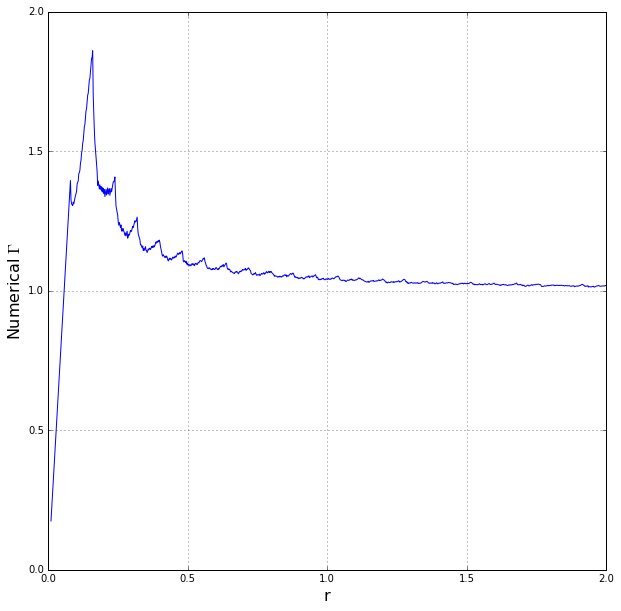

In [173]:
r_array = np.linspace(0.01, 2, 1000)
gamma_array = np.zeros(1000)
for k in range (1000):
    for theta in range (int(Ntheta)):
        i = int(r_array[k]*math.cos(theta*dtheta)/dx)+N/2
        j = int(r_array[k]*math.sin(theta*dtheta)/dy)+N/2
        velocity = math.sqrt(u_v[j,i]**2+v_v[j,i]**2)
        gamma_array[k] = gamma_array[k]+velocity*r_array[k]*dtheta
fsize = 10
plt.figure(figsize = (fsize,(yn-y0)/(xn-x0)*fsize))
plt.xlabel('r', fontsize = 16)
plt.ylabel('Numerical $\Gamma$', fontsize = 16)
plt.plot(r_array, gamma_array);
plt.grid('on')

This image above clearly shows that when the intergration path radius is close to zero, the numerical result is quite different. When the radius increases, the result will converge to the correct answer.

Such an error is a result of the numerical approximation. When the radius is too small, there are not enough grids locate at the path. If try a 10 times fine grid:

/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


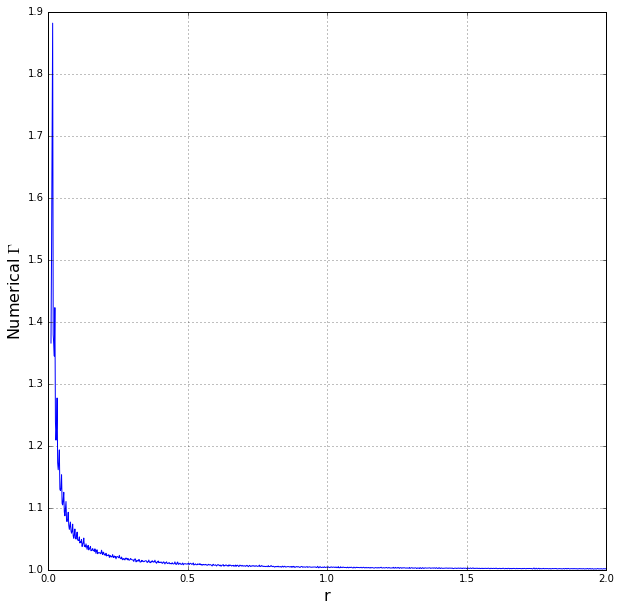

In [174]:
N = 1000                                
x0, xn = -4.0, 4.0            
y0, yn = -4.0, 4.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y)   
Ntheta = 200.
dtheta = 2.*math.pi/Ntheta
dx = (xn-x0)/N
dy = (yn-y0)/N
gamma = 1.
x_v, y_v = 0.0, 0.0
u_v, v_v = velocity_vortex(gamma, x_v, y_v, X, Y)
r_array = np.linspace(0.01, 2, 1000)
gamma_array = np.zeros(1000)
for k in range (1000):
    for theta in range (int(Ntheta)):
        i = int(r_array[k]*math.cos(theta*dtheta)/dx)+N/2
        j = int(r_array[k]*math.sin(theta*dtheta)/dy)+N/2
        velocity = math.sqrt(u_v[j,i]**2+v_v[j,i]**2)
        gamma_array[k] = gamma_array[k]+velocity*r_array[k]*dtheta
fsize = 10
plt.figure(figsize = (fsize,(yn-y0)/(xn-x0)*fsize))
plt.xlabel('r', fontsize = 16)
plt.ylabel('Numerical $\Gamma$', fontsize = 16)
plt.plot(r_array, gamma_array);
plt.grid('on')

Now, the result converges faster. A fine grid can decrease the numerical error.

## Problem 2

In [175]:
N = 100                                
x0, xn = -10.0, 10.0            
y0, yn = -10.0, 10.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y) 
gamma1 = 1.
gamma2 = -1.
gamma3 = 1.
gamma4 = -1.
gamma5 = 1.
gamma6 = -1.
r_v = 0.1
x_v1, y_v1 = r_v*math.cos(math.pi/3), r_v*math.sin(math.pi/3)
x_v2, y_v2 = r_v*math.cos(math.pi*4/3), r_v*math.sin(math.pi*4/3)
x_v3, y_v3 = r_v*math.cos(math.pi*2/3), r_v*math.sin(math.pi*2/3)
x_v4, y_v4 = r_v*math.cos(math.pi*5/3), r_v*math.sin(math.pi*5/3)
x_v5, y_v5 = r_v*math.cos(math.pi), r_v*math.sin(math.pi)
x_v6, y_v6 = r_v*math.cos(math.pi*2), r_v*math.sin(math.pi*2)
u_v1, v_v1 = velocity_vortex(gamma1, x_v1, y_v1, X, Y)
u_v2, v_v2 = velocity_vortex(gamma2, x_v2, y_v2, X, Y)
u_v3, v_v3 = velocity_vortex(gamma3, x_v3, y_v3, X, Y)
u_v4, v_v4 = velocity_vortex(gamma4, x_v4, y_v4, X, Y)
u_v5, v_v5 = velocity_vortex(gamma5, x_v5, y_v5, X, Y)
u_v6, v_v6 = velocity_vortex(gamma6, x_v6, y_v6, X, Y)
u_v = u_v1+u_v2+u_v3+u_v4+u_v5+u_v6
v_v = v_v1+v_v2+v_v3+v_v4+v_v5+v_v6
r = 9
Ntheta = 200.
dtheta = 2.*math.pi/Ntheta
dx = (xn-x0)/N
dy = (yn-y0)/N
gamma_numerical = 0
for theta in range (int(Ntheta)):
    i = int(r*math.cos(theta*dtheta)/dx)+N/2
    j = int(r*math.sin(theta*dtheta)/dy)+N/2
    velocity = math.sqrt(u_v[j,i]**2+v_v[j,i]**2)
    gamma_numerical = gamma_numerical+velocity*r*dtheta
print (gamma_numerical)

0.04504199221736566


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:37: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


The total circulation is calculated along the intergration path far away from the vortices. The value equals to the absolute value of the strength summation as expected.

## Problem 3

### Question a

In [176]:
def stream_function_vortex(gamma, x_v, y_v, X, Y):
    """Returns the stream-function of a vortex,
    where
    gamma - strength of the vortex,
    x_v, y_v - coordinates of the vortex,
    X, Y -- mesh grid.
    """
    psi = gamma/(4*math.pi)*np.log((X-x_v)**2+(Y-y_v)**2)
    
    return psi

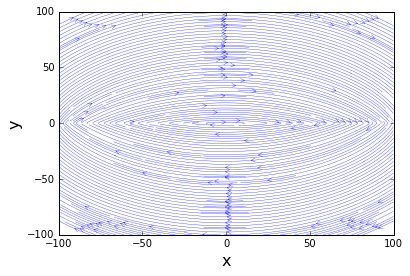

In [208]:
N = 100                       
x0, xn = -100.0, 100.0            
y0, yn = -100.0, 100.0            
x = np.linspace(x0, xn, N)    
y = np.linspace(y0, yn, N)    
X, Y = np.meshgrid(x, y) 
vN = 200
a = (xn-x0)/vN
gamma = 1.
x_vs = np.zeros(vN)
y_vs = np.zeros(vN)
u = np.zeros([N,N])
v = np.zeros([N,N])
psi = np.zeros([N,N])
for vnum in range (vN):
    x_vs[vnum] = a*vnum-xn
    psi = psi+stream_function_vortex(gamma, x_vs[vnum], y_vs[vnum], X, Y)
    u_vs, v_vs = velocity_vortex(gamma, x_vs[vnum], y_vs[vnum], X, Y)
    u = u+u_vs
    v = v+v_vs
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

If zoom in, only look at 10% flow field at the center:

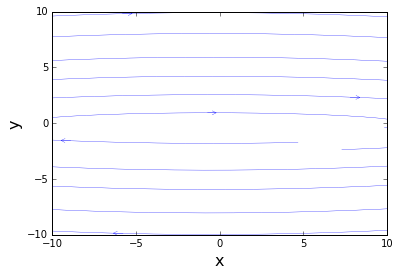

In [209]:
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0/10, xn/10)
plt.ylim(y0/10, yn/10)
plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

This zoomed-in image indicates that the flow field above and beneath the vortex row is very close to uniform flow (two free stream flowing at opposite direction). Moreover, there is no flow go across the vortex row.

### Question b

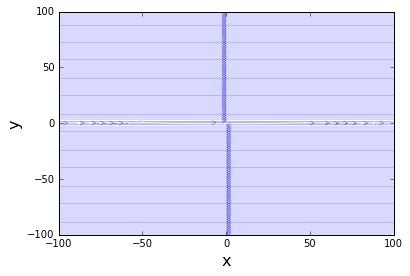

In [224]:
u = gamma/(2*a)*np.sinh(2*math.pi*Y/a)/(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/a))
v = -gamma/(2*a)*np.sin(2*math.pi*X/a)/(np.cosh(2*math.pi*Y/a)-np.cos(2*math.pi*X/a))
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0, xn)
plt.ylim(y0, yn)
plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

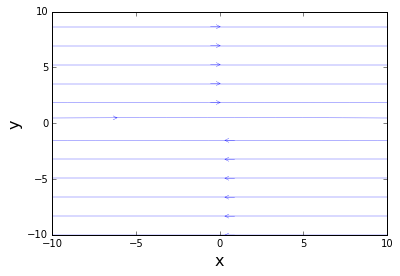

In [211]:
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0/10, xn/10)
plt.ylim(y0/10, yn/10)
plt.streamplot(X, Y, u, v, density = 4, linewidth = 0.3, arrowsize = 1, arrowstyle = '->');

Comparing with the images in question a, it is obvious that the infinite vortics row can generate a perfect uniform flow while the finite one can only approximate it. 

### Question c

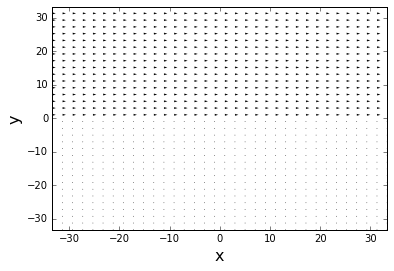

In [226]:
u_inf = 0.3
u = u+u_inf*np.ones([N,N])
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.xlim(x0/3, xn/3)
plt.ylim(y0/3, yn/3)
plt.quiver(X, Y, u, v);

If there is an extra free stream applied on the infinite vortex row, the vortex field in the same direction will be accelerated and the opposite flow will be decelerated. In this case, the flow above the row is accelerated while the flow below it is decelerated. According to Bernoulli's equation, the increased velocity will decrease the pressure and vice versa. Thus, in this case, the pressure above the row will be lowered while the pressure below will increase.